# Is there a math behind learning math?  

## Project Description 

 The objective of the project is to analyze various factors that may affect students' performance in a subject. Especially the project would try to check Is spending more time in a subject such as math really improve students' performance in that subject? Is there any other factors that affect student performance? 

## Data
The Programme for International Student Assessment (PISA) is a triennial international survey which aims to evaluate education systems worldwide by testing the skills and knowledge of 15-year-old students. I like to use the data from this survey and analyze the same to get answer for the questions above. 
The data used in the project is available at  https://pisa2012.acer.edu.au/downloads.php

## Data Sampling  

The data provided in the PISA web site is huge (more than 1GB). As it is not practical to submit huge data for this project a subset of the data is considered. Following variables from the PISA data set are considered for analysis. 
- Country
- Truancy - Skip whole school day
- Maths Interest - Enjoy Reading
- Maths Interest - Look Forward to Lessons
- Maths Interest - Enjoy Maths
- Subjective Norms - Parents Believe Studying Mathematics Is Important
- Subjective Norms - Parents Believe Mathematics Is Important for Career
- Min in <class period> - <Maths>
- No of <class period> p/wk - <Maths>
- No of ALL <class period> a week
- Educational level of father (ISCED)
- Educational level of mother (ISCED)
- Learning time (minutes per week)- <Mathematics>
- Out-of-School Study Time
- Wealth
- Plausible value 1 in mathematics
- Plausible value 2 in mathematics
- Plausible value 3 in mathematics
- Plausible value 4 in mathematics
- Plausible value 5 in mathematics  


 Also, a 10% random sample of the cases is taken from the file.
 The full file is available at <https://pisa2012.acer.edu.au/downloads/INT_STU12_DEC03.zip>
 

### Python Packages  Used
For this project the pandas package is used to handle the data, ggplot is used for visualization, scipy is used for statistical testing and sklearn is used for regression model. 

In [1]:
from ggplot import *
import pandas as pd
from scipy import stats
from sklearn import linear_model
from sklearn.feature_selection import RFE

Magic function to show plot inline

In [2]:
%matplotlib inline

The file provided by PISA is a fixed format file. The pandas read_fwf function will be used to parse the file. The field width for the variables are obtained by going over the the PISA data documentation available on PISA website. As the file does not have any header row, the variable names need to be provided manually.

In [3]:
field_widths=[3,1,1,1,1,1,1,4,4,4,1,1,4,8,8,9,9,9,9,9]
colnames=["country_code","skip_school","enjoy_reading","look_forward","enjoy_maths","parents_math_important","parents_for_carrer","class_time","math_classes_week","all_classes_week","father_edu_level","mother_edu_level","learning_time","out_of_school_study_time","wealth","math_score1","math_score2","math_score3","math_score4","math_score5"]

In [4]:
mathscore=pd.read_fwf("math_scores_sample.txt",widths=field_widths,names=colnames)

The dataset had about 48,000 observations. Given below is the summary of the data.

In [5]:
mathscore.describe()

,skip_school,enjoy_reading,look_forward,enjoy_maths,parents_math_important,parents_for_carrer,class_time,math_classes_week,all_classes_week,father_edu_level,mother_edu_level,learning_time,out_of_school_study_time,wealth,math_score1,math_score2,math_score3,math_score4,math_score5
count,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000
mean,1.332603,4.207895,4.169159,4.149146,3.561064,3.656643,3876.357266,3848.130833,4756.826601,4.210332,4.075853,4284.718526,3647.132656,122.763913,468.931490,468.893706,469.227776,469.027433,469.095820
std,0.947573,2.205639,2.251288,2.273616,2.626306,2.579893,4837.722217,4861.687625,4976.513157,2.133039,1.983586,4815.431518,4805.867892,1102.638915,102.540466,102.813303,102.795526,102.642480,102.673958
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-6.080000,87.716200,81.251000,92.234000,114.979000,37.085200
25%,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,45.000000,4.000000,31.000000,3.000000,2.000000,200.000000,6.000000,-1.040000,395.240700,395.552300,395.240700,395.338075,395.162800
50%,1.000000,3.000000,3.000000,3.000000,2.000000,2.000000,60.000000,5.000000,45.000000,4.000000,4.000000,300.000000,16.000000,-0.290000,465.189300,465.968200,465.500900,465.384050,465.267200
75%,1.000000,7.000000,7.000000,7.000000,7.000000,7.000000,9997.000000,9997.000000,9997.000000,6.000000,6.000000,9997.000000,9999.000000,0.440000,539.344100,540.045200,540.123100,540.201000,540.259425
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9999.000000,9999.000000,9999.000000,9.000000,9.000000,9999.000000,9999.000000,9999.000000,853.333900,857.851700,901.394300,881.141900,862.447400


Let's take a peek at the data

In [6]:
mathscore.head(5)

,country_code,skip_school,enjoy_reading,look_forward,enjoy_maths,parents_math_important,parents_for_carrer,class_time,math_classes_week,all_classes_week,father_edu_level,mother_edu_level,learning_time,out_of_school_study_time,wealth,math_score1,math_score2,math_score3,math_score4,math_score5
0,ALB,2,7,7,7,7,7,30,3,30,4,4,90,23,-1.82,463.6314,441.0422,425.4635,421.5688,417.6741
1,ALB,1,1,1,2,2,2,45,5,35,2,2,225,36,-0.73,132.5830,278.2443,233.0659,257.9919,250.2025
2,ALB,1,7,7,7,7,7,45,4,29,2,2,180,5,-2.30,425.4635,408.3268,387.2955,419.2320,408.3268
3,ALB,1,1,1,2,1,1,45,5,29,2,5,225,30,-0.82,380.8303,351.2307,378.4935,358.2412,368.3673
4,ALB,2,2,3,3,2,2,9997,9997,9997,4,4,9997,9999,0.04,448.0527,351.4644,416.8952,409.1058,455.8420


 ## Prepare Data

### Plausible Scores
The PISA dataset provides the score as plausible values rather than as individual value. After going over the technical documentation we could understand that we won't be able to obtain individual score from plausible (taking a mean of plausible value is not correct). So as all plausible values represent a likely score let's transform the data such that each plausible value becomes an observation by itself. We shall use panda melt function to do the same. 

In [7]:
plausible_values=["math_score1","math_score2","math_score3","math_score4","math_score"]
id_columns = ["country_code", "skip_school","enjoy_reading","look_forward", "enjoy_maths","parents_math_important", "parents_for_carrer","class_time","math_classes_week","all_classes_week","learning_time","out_of_school_study_time", "mother_edu_level","father_edu_level","wealth"]

In [8]:
mathscore=pd.melt(mathscore,id_vars=id_columns,value_vars=plausible_values,var_name="Plausible",value_name="score")

In [9]:
mathscore.head(10)

,country_code,skip_school,enjoy_reading,look_forward,enjoy_maths,parents_math_important,parents_for_carrer,class_time,math_classes_week,all_classes_week,learning_time,out_of_school_study_time,mother_edu_level,father_edu_level,wealth,Plausible,score
0,ALB,2,7,7,7,7,7,30,3,30,90,23,4,4,-1.82,math_score1,463.6314
1,ALB,1,1,1,2,2,2,45,5,35,225,36,2,2,-0.73,math_score1,132.5830
2,ALB,1,7,7,7,7,7,45,4,29,180,5,2,2,-2.30,math_score1,425.4635
3,ALB,1,1,1,2,1,1,45,5,29,225,30,5,2,-0.82,math_score1,380.8303
4,ALB,2,2,3,3,2,2,9997,9997,9997,9997,9999,4,4,0.04,math_score1,448.0527
5,ALB,1,1,1,1,1,1,45,4,30,180,11,4,4,-2.30,math_score1,479.3659
6,ALB,2,7,7,7,7,7,45,3,30,135,39,6,3,0.31,math_score1,346.0118
7,ALB,1,2,3,3,2,2,9997,9997,9997,9997,9999,4,2,-2.30,math_score1,418.5309
8,ALB,1,3,3,3,3,3,9997,9997,9997,9997,9999,4,4,0.69,math_score1,429.3582
9,ALB,1,2,2,2,2,2,45,5,30,225,31,4,5,-0.73,math_score1,370.6263


In [10]:
mathscore.describe()

,skip_school,enjoy_reading,look_forward,enjoy_maths,parents_math_important,parents_for_carrer,class_time,math_classes_week,all_classes_week,learning_time,out_of_school_study_time,mother_edu_level,father_edu_level,wealth,score
count,244090.000000,244090.000000,244090.000000,244090.000000,244090.000000,244090.000000,244090.000000,244090.000000,244090.000000,244090.000000,244090.000000,244090.000000,244090.000000,244090.000000,195272.000000
mean,1.332603,4.207895,4.169159,4.149146,3.561064,3.656643,3876.357266,3848.130833,4756.826601,4284.718526,3647.132656,4.075853,4.210332,122.763913,469.020101
std,0.947565,2.205621,2.251270,2.273597,2.626285,2.579872,4837.682578,4861.647789,4976.472381,4815.392061,4805.828514,1.983570,2.133022,1102.629880,102.697298
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-6.080000,81.251000
25%,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,45.000000,4.000000,31.000000,200.000000,6.000000,2.000000,3.000000,-1.040000,395.318600
50%,1.000000,3.000000,3.000000,3.000000,2.000000,2.000000,60.000000,5.000000,45.000000,300.000000,16.000000,4.000000,4.000000,-0.290000,465.423000
75%,1.000000,7.000000,7.000000,7.000000,7.000000,7.000000,9997.000000,9997.000000,9997.000000,9997.000000,9999.000000,6.000000,6.000000,0.440000,540.045200
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9.000000,9.000000,9999.000000,901.394300


## Cleanse Data  

The country name is stores as three digit code. The country code mapping is stored in a file and let's use that file to convert country code to name.

In [11]:
import ast
with open("country_code.txt","r") as country_file:
    country_codes = country_file.read()
    country_names = ast.literal_eval(country_codes)
country_names['ALB']
mathscore.country_code.replace(country_names,inplace=True)

Some of the values in the dataset represent a missing or not applicable value. Let's mark them so. 

In [12]:
mathscore.loc[mathscore.skip_school>4,'skip_school']=None
mathscore.loc[mathscore.enjoy_reading>4,'enjoy_reading']=None
mathscore.loc[mathscore.look_forward>4,'look_forward']=None
mathscore.loc[mathscore.enjoy_maths>4,'enjoy_reading']=None
mathscore.loc[mathscore.parents_math_important>4,'parents_math_important']=None
mathscore.loc[mathscore.parents_for_carrer>4,'parents_for_carrer']=None
mathscore.loc[mathscore.class_time>9996,'class_time']=None
mathscore.loc[mathscore.math_classes_week>9996,'math_classes_week']=None
mathscore.loc[mathscore.all_classes_week>9996,'all_classes_week']=None
mathscore.loc[mathscore.father_edu_level>6,'father_edu_level']=None
mathscore.loc[mathscore.mother_edu_level>6,'mother_edu_level']=None
mathscore.loc[mathscore.learning_time>9996,'learning_time']=None
mathscore.loc[mathscore.out_of_school_study_time >9996,'out_of_school_study_time']=None
mathscore.loc[mathscore.wealth>9996,'wealth']=None
mathscore.head(5)

,country_code,skip_school,enjoy_reading,look_forward,enjoy_maths,parents_math_important,parents_for_carrer,class_time,math_classes_week,all_classes_week,learning_time,out_of_school_study_time,mother_edu_level,father_edu_level,wealth,Plausible,score
0,Albania,2,NaN,NaN,7,NaN,NaN,30,3,30,90,23,4,4,-1.82,math_score1,463.6314
1,Albania,1,1,1,2,2,2,45,5,35,225,36,2,2,-0.73,math_score1,132.5830
2,Albania,1,NaN,NaN,7,NaN,NaN,45,4,29,180,5,2,2,-2.30,math_score1,425.4635
3,Albania,1,1,1,2,1,1,45,5,29,225,30,5,2,-0.82,math_score1,380.8303
4,Albania,2,2,3,3,2,2,NaN,NaN,NaN,NaN,NaN,4,4,0.04,math_score1,448.0527


Let's look at the summary statistics after the data cleanup

In [13]:
mathscore.describe()

,skip_school,enjoy_reading,look_forward,enjoy_maths,parents_math_important,parents_for_carrer,class_time,math_classes_week,all_classes_week,learning_time,out_of_school_study_time,mother_edu_level,father_edu_level,wealth,score
count,240745.000000,158585.000000,158970.000000,244090.000000,159135.000000,158980.000000,150240.000000,150200.000000,128350.000000,142710.00000,155230.000000,234810.000000,227660.000000,241085.000000,195272.000000
mean,1.242435,2.697418,2.618104,4.149146,1.691865,1.831331,52.874135,4.361751,31.148539,226.58265,11.064034,3.881244,3.864667,-0.338269,469.020101
std,0.552300,0.894175,0.903732,2.273597,0.691373,0.772298,17.002372,1.675710,9.047236,98.49093,10.305933,1.758946,1.761539,1.217371,102.697298
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,-6.080000,81.251000
25%,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,45.000000,3.000000,28.000000,180.00000,4.000000,2.000000,2.000000,-1.040000,395.318600
50%,1.000000,3.000000,3.000000,3.000000,2.000000,2.000000,50.000000,4.000000,32.000000,220.00000,8.000000,4.000000,4.000000,-0.300000,465.423000
75%,1.000000,3.000000,3.000000,7.000000,2.000000,2.000000,55.000000,5.000000,35.000000,250.00000,14.000000,5.000000,6.000000,0.430000,540.045200
max,4.000000,4.000000,4.000000,9.000000,4.000000,4.000000,180.000000,34.000000,200.000000,1800.00000,180.000000,6.000000,6.000000,3.250000,901.394300


Many of the variables in the dataset represent a categorical variable, but they are coded as numeric. Let's convert those to categorical variable.

In [14]:
mathscore['mother_edu_level']=mathscore.mother_edu_level.astype('category')
mathscore['father_edu_level']=mathscore.father_edu_level.astype('category')
mathscore['enjoy_maths']=mathscore.enjoy_maths.astype('category')
mathscore.enjoy_reading=mathscore.enjoy_reading.astype('category')
mathscore.enjoy_maths=mathscore.enjoy_maths.astype('category')
mathscore.look_forward=mathscore.look_forward.astype('category')
mathscore.parents_for_carrer=mathscore.parents_for_carrer.astype('category')
mathscore.parents_math_important=mathscore.parents_math_important.astype('category')
mathscore.country_code=mathscore.country_code.astype('category')

## Visualization  

Let's analyze the data by generating various graphs of interest. 
Let's look at scores of some countries of interest and check how the students from those countries are doing.

In [15]:
sel_countries=["Shanghai-China","Singapore","Hong Kong-China","Taiwan","Korea","Macau","Japan","Liechtenstein","Switzerland","Netherlands","Estonia","Finland","Canada","Poland","Belgium","Germany","Vietnam","Austria","Australia","Ireland","Slovenia","Denmark","New Zealand","Czech Republic","France","United States of America"]
select_country_score=mathscore.loc[[country in sel_countries for country in mathscore.country_code.values],:]

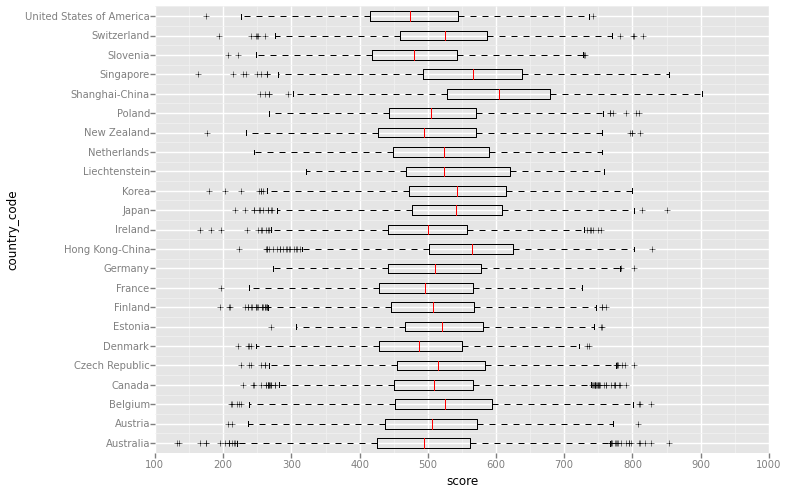

<ggplot: (4044173)>

In [16]:
ggplot(select_country_score,aes(y='country_code',x="score"))+geom_boxplot()

Factors such as parent's education level, wealth, study time are often associated with the performance of the student. Let's check how they are correlated in the data we have.

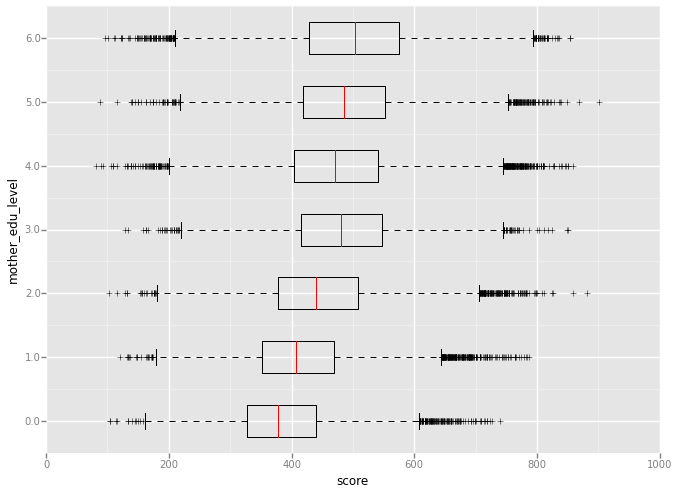

<ggplot: (37696660)>

In [17]:
ggplot(mathscore,aes(y='mother_edu_level',x="score"))+geom_boxplot()

**There seems to be a positive correlation between mother education level and student score.**

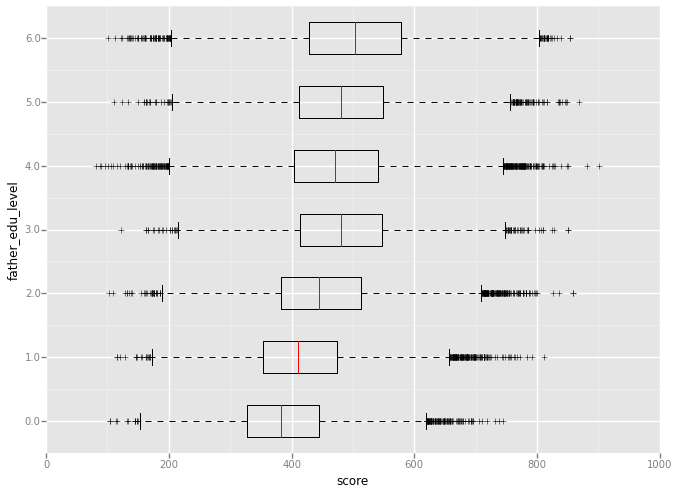

<ggplot: (37693735)>

In [18]:
ggplot(mathscore,aes(y='father_edu_level',x="score"))+geom_boxplot()

**There seems to be a positive correlation between father education level and student score as well.**

C:\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


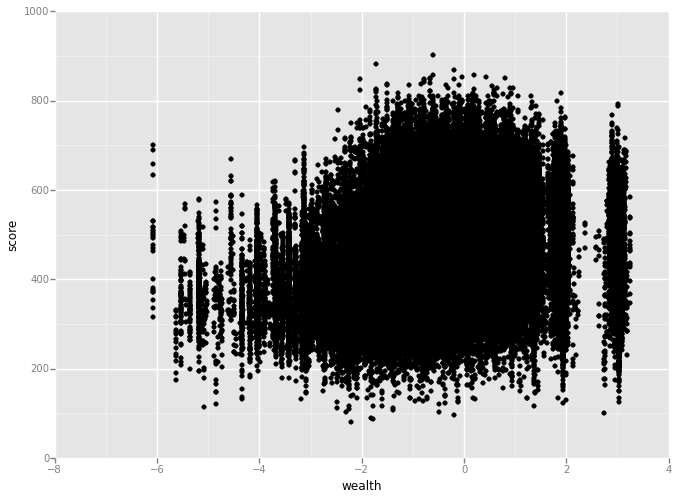

<ggplot: (35609492)>

In [19]:
ggplot(mathscore,aes(x='wealth',y='score')) + geom_point() 

Wealthy student seems to do better than poor students.

Now let's analyze the time spend on study. Let's compute time spent on math class and check if there is a correlation.

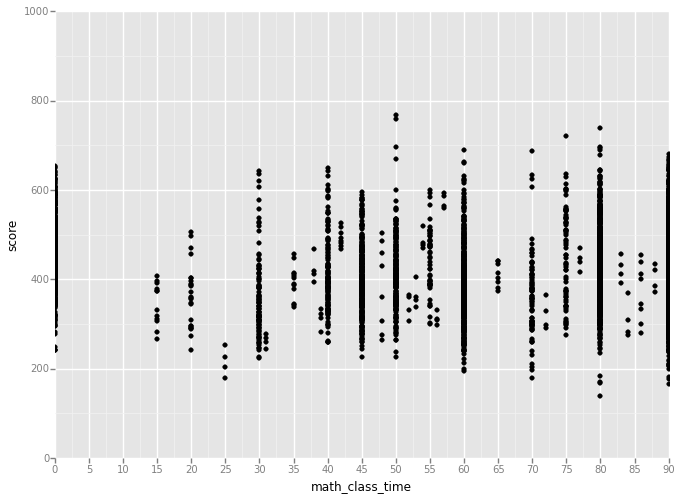

<ggplot: (35199481)>

In [20]:
mathscore.loc[:,'math_class_time']=mathscore.class_time*mathscore.math_classes_week
ggplot(mathscore,aes(x='math_class_time',y='score')) + geom_point() + scale_x_continuous(limits = (0, 90))

It's difficult to see a trend in above data. To better understand the data let's find mean score by time spent in math class.

In [21]:
score_bytime=mathscore[['math_class_time','score']].groupby('math_class_time',as_index=False)
mean_score_bytime=score_bytime.mean()
mean_score_bytime.loc[:,'counts']=score_bytime.count()['score']
mean_score_bytime

,math_class_time,score,counts
0,0,460.444975,540
1,15,344.064500,12
2,20,363.174433,24
3,25,215.228250,4
4,30,362.984891,100
5,31,262.353950,4
6,35,393.059683,12
7,38,422.737175,4
8,39,312.673325,4
9,40,416.353239,140


In [22]:
mean_score_bytime.sort_values('score',ascending=False)

,math_class_time,score,counts
155,384,797.600875,4
130,306,664.220808,12
127,296,654.354275,4
179,488,632.621925,4
38,116,623.781000,4
135,318,621.327300,4
131,308,613.498975,4
180,490,601.386525,4
33,96,598.621287,8
116,272,589.507675,4


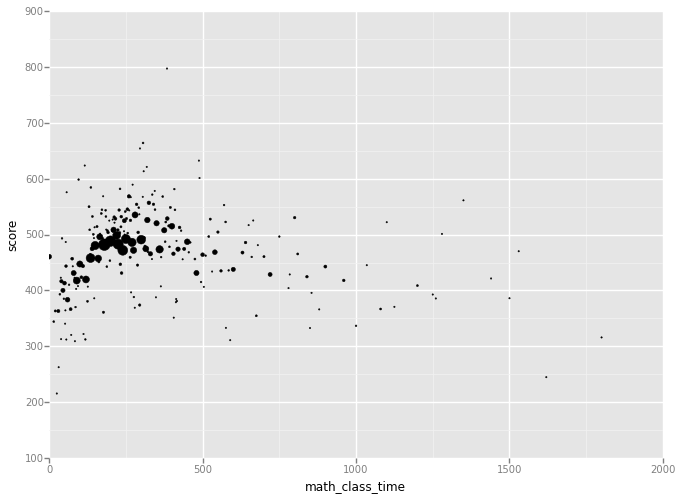

<ggplot: (35989887)>

In [23]:
ggplot(mean_score_bytime,aes(x='math_class_time',y='score')) + geom_point(aes(size=mean_score_bytime.counts**.5)) + scale_x_continuous(limits = (0, 2000))         

**It does appear like there is a positive correlation between the time spent on math class and score. But, as we could see from diagram the effect starts diminishing beyond certain amount of time.**

In [24]:
score_bylearntime=mathscore[['learning_time','score']].groupby('learning_time',as_index=False)
mean_score_bylearntime=score_bylearntime.mean()
mean_score_bylearntime.loc[:,'counts']=score_bylearntime.count()['score']

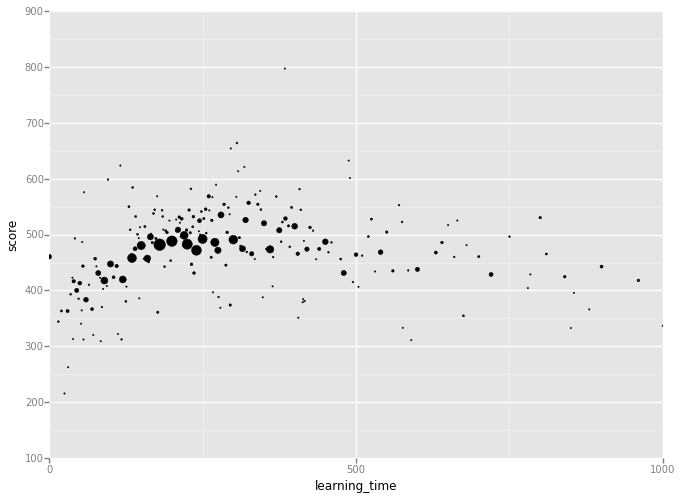

<ggplot: (38639501)>

In [25]:
ggplot(mean_score_bylearntime,aes(x='learning_time',y='score')) + geom_point(aes(size=mean_score_bylearntime.counts**.5)) + scale_x_continuous(limits = (0, 1000))         

**It does appear like there is a positive correlation between the time spent on learning math and score**

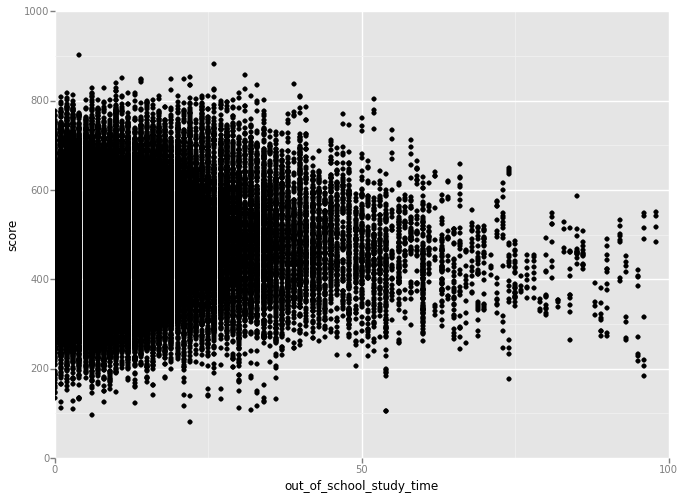

<ggplot: (37165270)>

In [26]:
ggplot(mathscore,aes(x='out_of_school_study_time',y='score')) + geom_point() + scale_x_continuous(limits = (0, 100))

## Hypothesis Testing  


### Student T-test   
From the visualization we could see that more the time spent on the class the better the score. But, it's not clear if the difference is significant enough or is it due to chance. Hypothesis testing could be used to check if the effect of time on the score is statistically significant or not. Let's divide the data into two group. One group to represent student who spend less than median time of the overall population and another group who spend more than median time. We could then perform student T-test to check if there is really significant difference in score.

Null Hypothesis: The mean score of the two groups are same
Alternate Hypothesis: The mean values of the two groups are not same

In [27]:
mathscore.math_class_time.median()



220.0

In [28]:
group_lt_median_ct = mathscore.loc[mathscore.math_class_time <= 220,'score']
group_gt_median_ct = mathscore.loc[mathscore.math_class_time > 220,'score']

In [29]:
group_gt_median_ct.describe()


count    54992.000000
mean       485.170749
std        102.735828
min        100.880200
25%        410.819400
50%        481.001700
75%        555.857600
max        901.394300
Name: score, dtype: float64

In [30]:
group_lt_median_ct.describe()

count    59176.000000
mean       472.568920
std         95.993339
min         81.251000
25%        403.653200
50%        470.564000
75%        539.344100
max        849.672800
Name: score, dtype: float64

Let's conduct t-test using scipy package 

In [31]:
group_gt_median_ct.dropna(inplace=True)
group_lt_median_ct.dropna(inplace=True)
stats.ttest_ind(group_gt_median_ct,group_lt_median_ct)

Ttest_indResult(statistic=21.426072706575162, pvalue=1.2122825686686597e-101)

**The P-value of the test is nearly zero. So, we reject the NULL hypothesis. From this test we could conclude that class time do have statistically significant impact on score**

In [32]:
group_lt_median_lt = mathscore.loc[mathscore.learning_time <= 220,'score']
group_gt_median_lt = mathscore.loc[mathscore.learning_time > 220,'score']
group_gt_median_lt.dropna(inplace=True)
group_lt_median_lt.dropna(inplace=True)


In [33]:
group_lt_median_lt.describe()

count    59176.000000
mean       472.568920
std         95.993339
min         81.251000
25%        403.653200
50%        470.564000
75%        539.344100
max        849.672800
Name: score, dtype: float64

In [34]:
group_gt_median_lt.describe()

count    54992.000000
mean       485.170749
std        102.735828
min        100.880200
25%        410.819400
50%        481.001700
75%        555.857600
max        901.394300
Name: score, dtype: float64

In [35]:
stats.ttest_ind(group_gt_median_lt,group_lt_median_lt)

Ttest_indResult(statistic=21.426072706575162, pvalue=1.2122825686686597e-101)

**The P-value of the test is nearly zero. So, we reject the NULL hypothesis. From this test we could conclude that learning time do have statistically significant impact on score**

## Regression Model

Let's build a linear regression model to understand how various factor affect the score. We could also check the significant/importance of various variable

In [36]:
lm = linear_model.LinearRegression()


Drop the variables that are not required for the regression model. Also, remove the observations with missing values.

In [37]:
mathscore.drop(["country_code","Plausible","class_time","math_classes_week"],axis=1,inplace=True)

In [38]:
mathscore.dropna(inplace=True)

Fit the model to the data to predict score using all other variables

In [39]:
lm.fit(mathscore.dropna().drop("score",axis=1),mathscore.dropna()["score"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
lm.coef_

array([ -3.07554240e+01,   5.21883883e+00,   5.62377085e+00,
        -1.82781973e+01,  -1.13867325e+01,   9.79142279e+00,
         2.05040758e+00,   2.55855721e+12,  -2.33907662e-01,
         7.25161297e+00,   5.34518309e+00,   1.32062387e+01,
        -2.55855721e+12])

The coefficient of the learning time is positive which indicate that more time spent translates into more score.  But the coefficient of class_time is negative.
  
Let's check variable importance

In [41]:
rfe=RFE(lm)

In [42]:
importance=rfe.fit(mathscore.dropna().drop("score",axis=1),mathscore.dropna()["score"])

In [43]:
importance.ranking_

array([1, 6, 4, 2, 1, 1, 7, 1, 8, 3, 5, 1, 1])

In [44]:
mathscore.dropna().drop("score",axis=1).columns.values

array(['skip_school', 'enjoy_reading', 'look_forward', 'enjoy_maths',
       'parents_math_important', 'parents_for_carrer', 'all_classes_week',
       'learning_time', 'out_of_school_study_time', 'mother_edu_level',
       'father_edu_level', 'wealth', 'math_class_time'], dtype=object)

The math class time and learning time are assigned highest importance along with other factors such as parent think math is important (in general or for career) and wealth.

## Conclusion
 
The visual analysis, hypothesis testing and regression model all suggest that the time spent on math do have statistically significant impact on the score. Based on the PISA data and the analysis performed in this project we could conclude that the time spent on math subject do have effect on the score. 